Load some auto insurance claims data and analyze for patterns.

In [1]:
%matplotlib inline
import pandas as pd

data_path = r'data/Auto_Insurance_Claims_Sample.csv'
auto_claims_df = pd.read_csv(data_path, parse_dates=True, infer_datetime_format=True, low_memory=False)
auto_claims_df.columns = auto_claims_df.columns.str.strip().str.replace(' ', '')
print(auto_claims_df.shape)
print(auto_claims_df.dtypes)

(9134, 26)
Customer                       object
Country                        object
StateCode                      object
State                          object
ClaimAmount                   float64
Response                       object
Coverage                       object
Education                      object
EffectiveToDate                object
EmploymentStatus               object
Gender                         object
Income                          int64
LocationCode                   object
MaritalStatus                  object
MonthlyPremiumAuto              int64
MonthsSinceLastClaim            int64
MonthsSincePolicyInception      int64
NumberofOpenComplaints          int64
NumberofPolicies                int64
PolicyType                     object
Policy                         object
ClaimReason                    object
SalesChannel                   object
TotalClaimAmount              float64
VehicleClass                   object
VehicleSize                    object
d

In [2]:
print('Claim Amount:', auto_claims_df.ClaimAmount.mean())
print('Total Amount:', auto_claims_df.TotalClaimAmount.mean())

Claim Amount: 800.4940474987092
Total Amount: 434.0887943128942


In [3]:
import matplotlib.pyplot as plt
import seaborn

import seaborn as sns
sns.set()

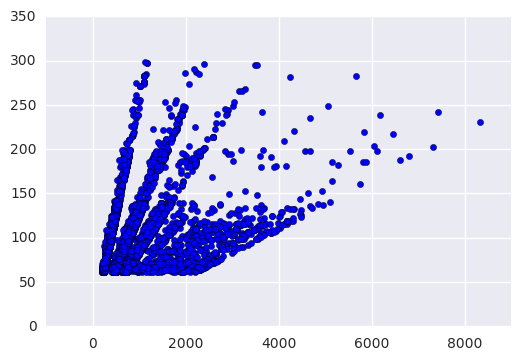

In [4]:
plt.scatter(auto_claims_df.ClaimAmount, auto_claims_df.MonthlyPremiumAuto)

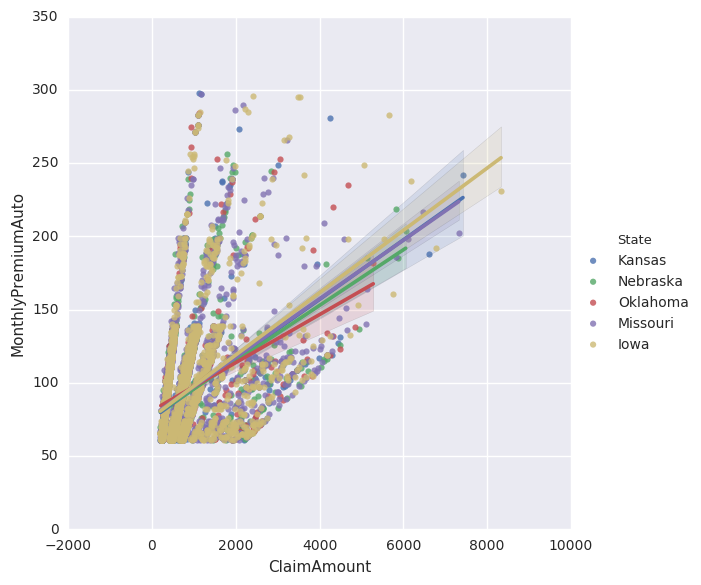

In [5]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="ClaimAmount", y="MonthlyPremiumAuto", hue="State",
               truncate=True, size=6, data=auto_claims_df)

# Optional axis labels
# g.set_axis_labels("Claim Amount", "Monthly Premium Auto")

In [6]:
auto_claims_df.columns

Index(['Customer', 'Country', 'StateCode', 'State', 'ClaimAmount', 'Response',
       'Coverage', 'Education', 'EffectiveToDate', 'EmploymentStatus',
       'Gender', 'Income', 'LocationCode', 'MaritalStatus',
       'MonthlyPremiumAuto', 'MonthsSinceLastClaim',
       'MonthsSincePolicyInception', 'NumberofOpenComplaints',
       'NumberofPolicies', 'PolicyType', 'Policy', 'ClaimReason',
       'SalesChannel', 'TotalClaimAmount', 'VehicleClass', 'VehicleSize'],
      dtype='object')

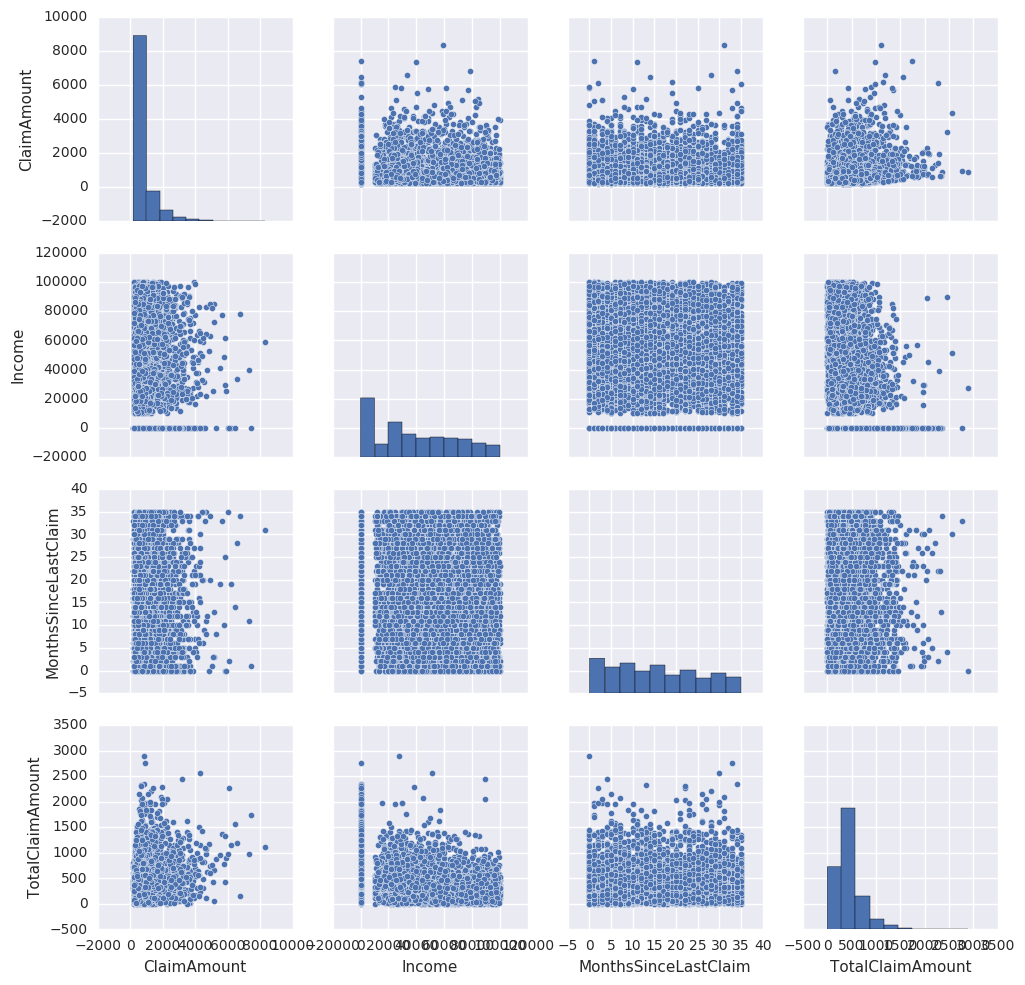

In [22]:
reduced_df = auto_claims_df.loc[:, ['ClaimAmount', 'Income', 'MonthsSinceLastClaim', 'TotalClaimAmount']]
# 'NumberofOpenComplaints', 'NumberofPolicies', 'MonthlyPremiumAuto'
# reduced_df
sns.pairplot(reduced_df.dropna())

In [77]:
from sklearn.decomposition import PCA, IncrementalPCA

n_components = 13

# reduced_df = auto_claims_df.loc[:, ['StateCode', 'State', 'ClaimAmount', 'Response',
#        'Coverage', 'Education', 'EffectiveToDate', 'EmploymentStatus',
#        'Gender', 'Income', 'LocationCode', 'MaritalStatus', 'PolicyType', 'Policy', 'ClaimReason',
#        'SalesChannel', 'VehicleClass', 'VehicleSize'
#         'ClaimAmount', 'Income', 'MonthsSinceLastClaim', 'TotalClaimAmount']]

auto_claims_df.State.astype('category').cat.codes
StateId = auto_claims_df.State.astype('category').cat.codes
reduced_df = auto_claims_df.loc[:, ['ClaimAmount', 'Income', 'MonthsSinceLastClaim', 'TotalClaimAmount']]
reduced_df['StateId'] = StateId
reduced_df['VehicleClassId'] = auto_claims_df.VehicleClass.astype('category').cat.codes
reduced_df['VehicleSizeId'] = auto_claims_df.VehicleSize.astype('category').cat.codes
reduced_df['SalesChannelId'] = auto_claims_df.SalesChannel.astype('category').cat.codes
reduced_df['LocationCodeId'] = auto_claims_df.LocationCode.astype('category').cat.codes
reduced_df['EmploymentStatusId'] = auto_claims_df.EmploymentStatus.astype('category').cat.codes
reduced_df['EducationId'] = auto_claims_df.Education.astype('category').cat.codes
reduced_df['CoverageId'] = auto_claims_df.Coverage.astype('category').cat.codes
reduced_df['MaritalStatusId'] = auto_claims_df.MaritalStatus.astype('category').cat.codes
# reduced_df

pca = PCA(n_components=n_components)
reduced_df_pca = pca.fit_transform(reduced_df)
reduced_df_pca

array([[  1.86163881e+04,  -5.29208832e+02,  -7.56019122e+01, ...,
          1.19735309e-02,  -1.81779339e-01,  -1.36959166e-01],
       [ -3.76595827e+04,  -1.54598915e+01,  -5.75075275e+02, ...,
         -4.10317193e-01,  -1.23967062e-01,  -2.20860991e-01],
       [  1.11093736e+04,   4.98551481e+02,  -1.13296821e+02, ...,
          2.43277713e-02,   5.97592737e-01,   6.71693577e-02],
       ..., 
       [ -3.76583600e+04,   6.28292207e+01,  -2.22998304e+02, ...,
         -4.28798125e-01,   1.96016552e-01,  -1.09765560e-01],
       [ -1.57171870e+04,  -1.55886475e+01,  -2.06896975e+02, ...,
         -4.21216505e-03,   1.48679400e-01,  -1.11577329e+00],
       [ -3.76572351e+04,  -5.37311444e+02,   1.31227014e+02, ...,
         -4.04566810e-01,   6.45207003e-01,   8.05690625e-02]])

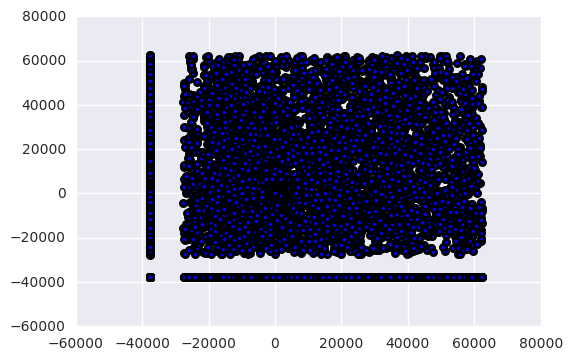

In [79]:
plt.scatter(reduced_df_pca[0:-1], reduced_df_pca[1:], lw=2)

In [89]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# bandwidth = estimate_bandwidth(reduced_df)

# print(reduced_df.dtypes)

ms = MeanShift(seeds=reduced_df)
ms.fit(reduced_df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

ClaimAmount             float64
Income                    int64
MonthsSinceLastClaim      int64
TotalClaimAmount        float64
StateId                    int8
VehicleClassId             int8
VehicleSizeId              int8
SalesChannelId             int8
LocationCodeId             int8
EmploymentStatusId         int8
EducationId                int8
CoverageId                 int8
MaritalStatusId            int8
dtype: object
